In [24]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import os
from scipy.cluster.hierarchy import dendrogram, linkage
import scipy.cluster.hierarchy as sch
from sklearn.cluster import AgglomerativeClustering
from sklearn.datasets import make_blobs
from sklearn.manifold import TSNE
import seaborn as sns
from sklearn.metrics import silhouette_samples, silhouette_score
import matplotlib.cm as cm
from sklearn.metrics import silhouette_score

In [3]:
folder_path = r"C:\Users\tere1\OneDrive\Escritorio\TFM\datos_img"
# Cargar las características normalizadas por Z-score
df_textura_z = pd.read_csv(os.path.join(folder_path, "features_glcm_all_zscore.csv"))
# Cargar las características normalizadas por Min-Max
df_textura_mm = pd.read_csv(os.path.join(folder_path, "features_glcm_all_minmax.csv"))

In [4]:
#Se eliminan los datos no numéricos: 'label' y 'filename'
df_textura_z_cl= df_textura_z.drop(columns=['filename', 'label'])

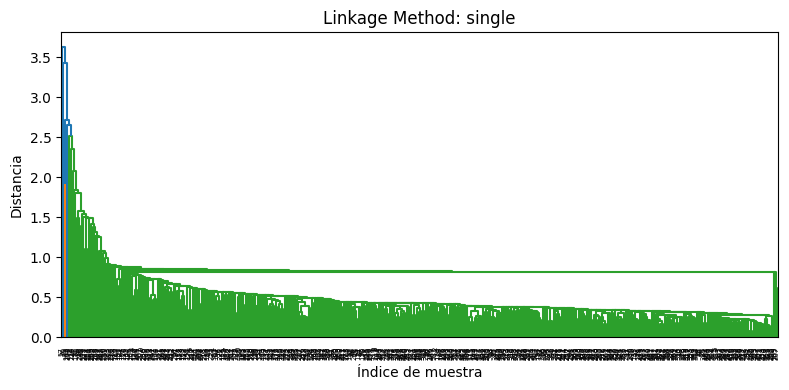

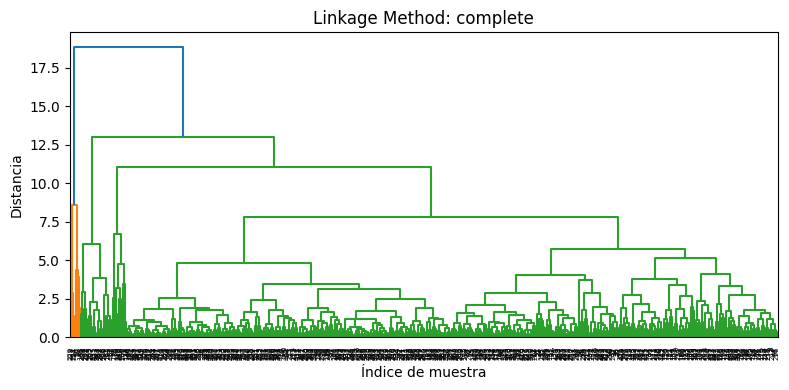

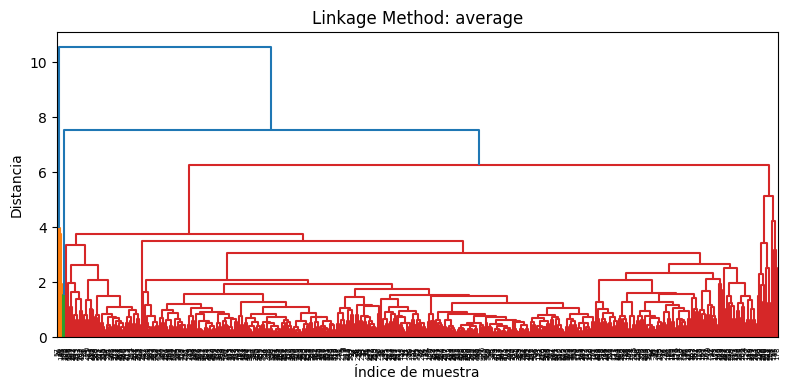

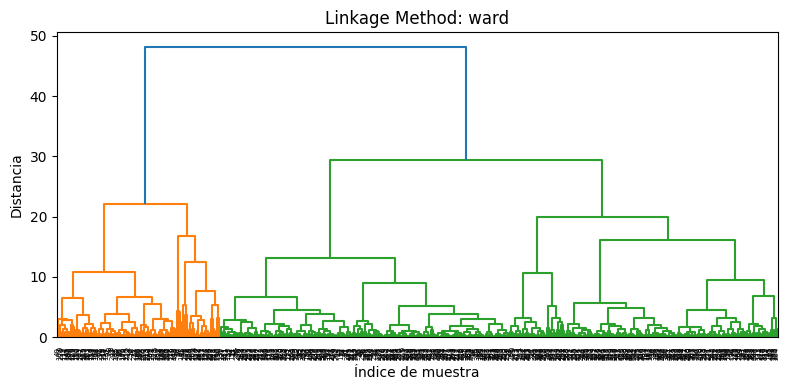

In [5]:
# Comparar diferentes métodos de linkage
methods = ['single', 'complete', 'average', 'ward']

for method in methods:
    clusters = linkage(df_textura_z_cl, method=method)
    plt.figure(figsize=(8, 4))
    dendrogram(clusters)
    plt.title(f'Linkage Method: {method}')
    plt.xlabel('Índice de muestra')
    plt.ylabel('Distancia')
    plt.tight_layout()
    plt.show()

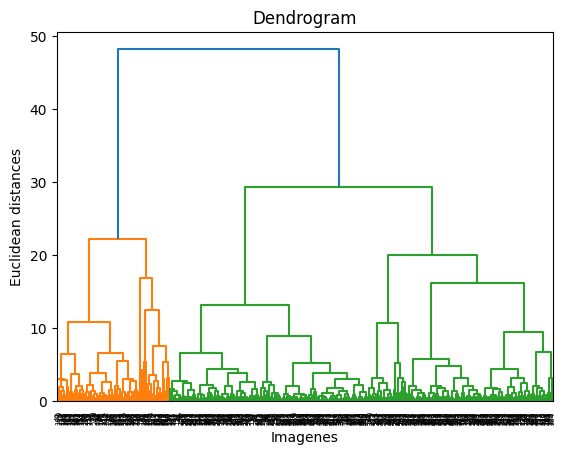

In [6]:
# Using the dendrogram to find the optimal number of clusters
dendrogram = sch.dendrogram(sch.linkage(df_textura_z_cl, method = 'ward'))
plt.title('Dendrogram')
plt.xlabel('Imagenes')
plt.ylabel('Euclidean distances')
plt.show()

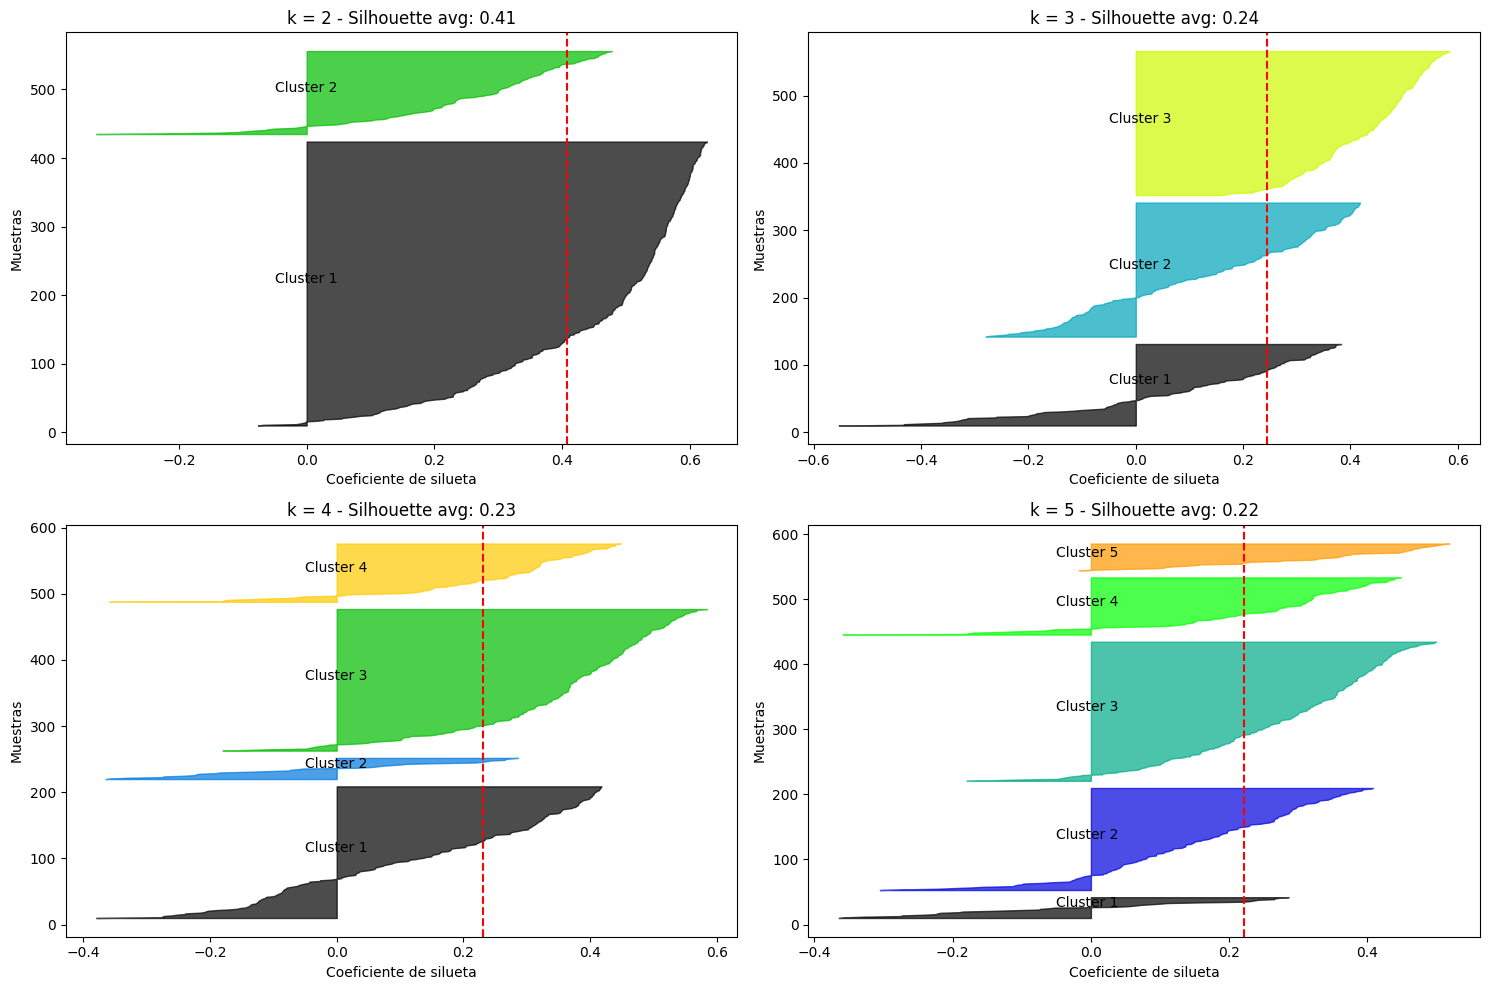

In [7]:
fig, ax = plt.subplots(2, 2, figsize=(15, 10))

# Probar con 2, 3, 4 y 5 clusters
for i, k in enumerate([2, 3, 4, 5]):
    clusterer = AgglomerativeClustering(n_clusters=k, linkage='ward', metric='euclidean')
    labels = clusterer.fit_predict(df_textura_z_cl)
    silhouette_vals = silhouette_samples(df_textura_z_cl, labels)
    silhouette_avg = silhouette_score(df_textura_z_cl, labels)

    # Subplot row/col
    row = i // 2
    col = i % 2
    ax_i = ax[row][col]
    y_lower = 10

    for j in range(k):
        j_silhouette_vals = silhouette_vals[labels == j]
        j_silhouette_vals.sort()
        size = len(j_silhouette_vals)
        y_upper = y_lower + size
        color = cm.nipy_spectral(float(j) / k)
        ax_i.fill_betweenx(np.arange(y_lower, y_upper), 0, j_silhouette_vals,
                           facecolor=color, edgecolor=color, alpha=0.7)
        ax_i.text(-0.05, y_lower + size / 2, f'Cluster {j+1}')
        y_lower = y_upper + 10

    ax_i.axvline(x=silhouette_avg, color="red", linestyle="--")
    ax_i.set_title(f'k = {k} - Silhouette avg: {silhouette_avg:.2f}')
    ax_i.set_xlabel("Coeficiente de silueta")
    ax_i.set_ylabel("Muestras")

plt.tight_layout()
plt.show()

Se podría "cortar" entre 20-30, por tanto, 2 clusteres-

In [17]:
hc_z = AgglomerativeClustering(n_clusters = 2, metric = 'euclidean', linkage = 'ward')
y_hc_z = hc_z.fit_predict(df_textura_z_cl)


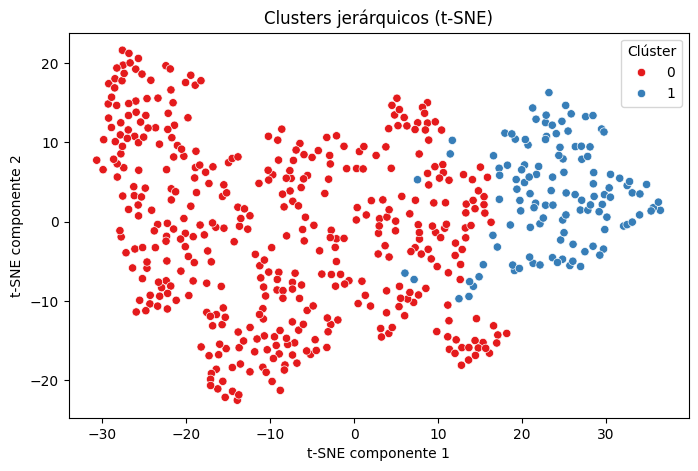

          filename    label  cluster
0      callo_1.png  smaller        0
1     callo_10.png  smaller        0
2    callo_100.png  smaller        1
3    callo_101.png  smaller        1
4    callo_102.png  smaller        1
..             ...      ...      ...
532   callo_95.png   higher        0
533   callo_96.png   higher        0
534   callo_97.png   higher        0
535   callo_98.png   higher        0
536   callo_99.png   higher        0

[537 rows x 3 columns]


In [18]:
#Visualización alternativa con t-SNE (
tsne_z = TSNE(n_components=2, random_state=42)
X_tsne_z = tsne_z.fit_transform(df_textura_z_cl)

plt.figure(figsize=(8, 5))
sns.scatterplot(x=X_tsne_z[:, 0], y=X_tsne_z[:, 1], hue=y_hc_z, palette='Set1')
plt.title('Clusters jerárquicos (t-SNE)')
plt.xlabel('t-SNE componente 1')
plt.ylabel('t-SNE componente 2')
plt.legend(title='Clúster')
plt.show()

df_resultado_z = pd.DataFrame({
    'filename': df_textura_z['filename'], 
    'label': df_textura_z['label'],
    'cluster': y_hc_z
})

print(df_resultado_z)

In [19]:
# Crear la tabla de contingencia entre 'label' y 'cluster'
contingency_table = pd.crosstab(df_resultado_z['label'], df_resultado_z['cluster'])

# Mostrar la tabla de contingencia
print(contingency_table)


cluster    0    1
label            
higher   258   10
smaller  157  112


el cluster 0 está bastante mezclado de smaller y higher, pro es que en smaller hay callos que son similares  a higher, o incluso había callos higher en la celda pero como los calllos pequeños eran muy pequeños bajaban la media de la celda, pude que sea ese el problema.

In [20]:
# y_hc_z son las etiquetas del clustering, df_fourier_z_cl los datos
score = silhouette_score(df_textura_z_cl, y_hc_z)
print(f'Silhouette Score: {score:.3f}')


Silhouette Score: 0.407


Se hace lo mismo pero con la normalización min-max

In [22]:
#Se eliminan los datos no numéricos: 'label' y 'filename'
df_textura_mm_cl= df_textura_mm.drop(columns=['filename', 'label'])

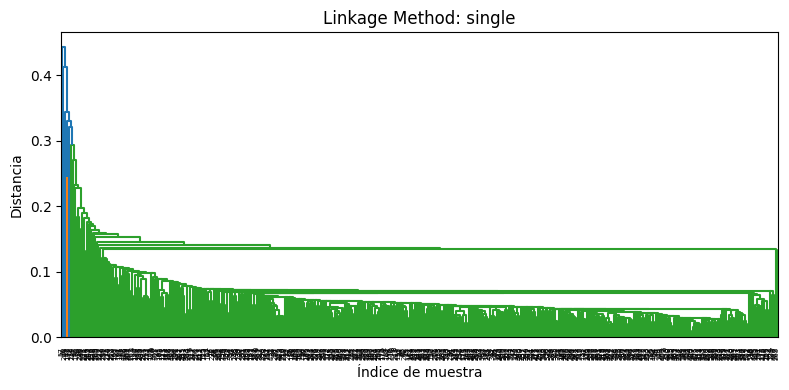

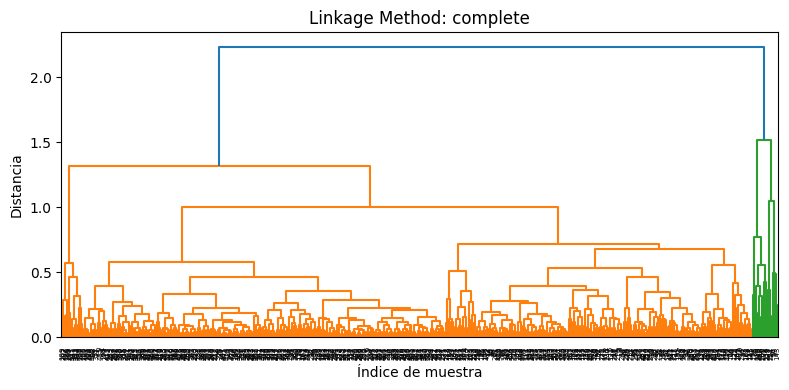

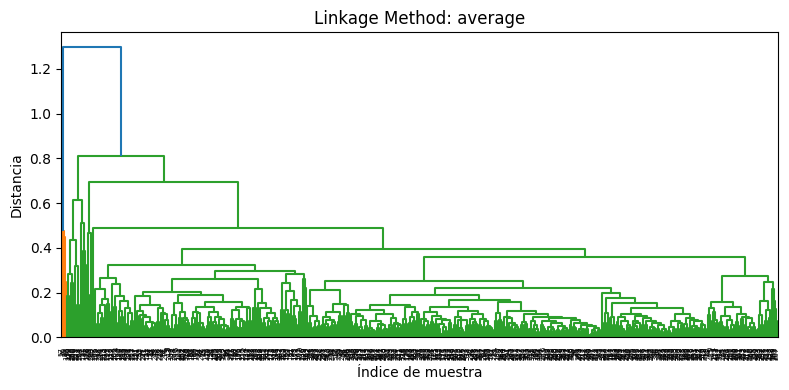

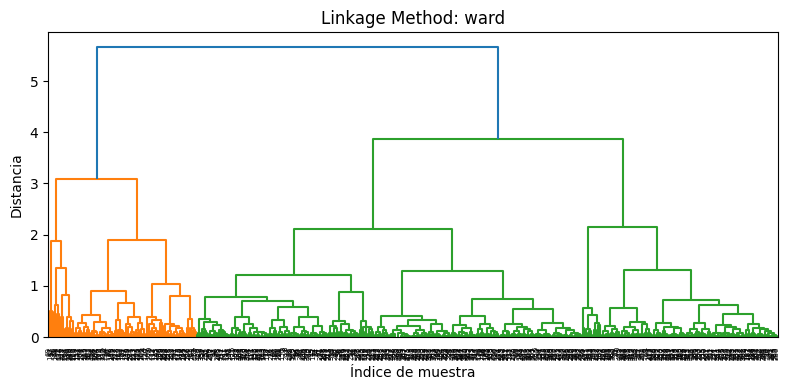

In [25]:
# Comparar diferentes métodos de linkage
methods = ['single', 'complete', 'average', 'ward']

for method in methods:
    clusters = linkage(df_textura_mm_cl, method=method)
    plt.figure(figsize=(8, 4))
    dendrogram(clusters)
    plt.title(f'Linkage Method: {method}')
    plt.xlabel('Índice de muestra')
    plt.ylabel('Distancia')
    plt.tight_layout()
    plt.show()

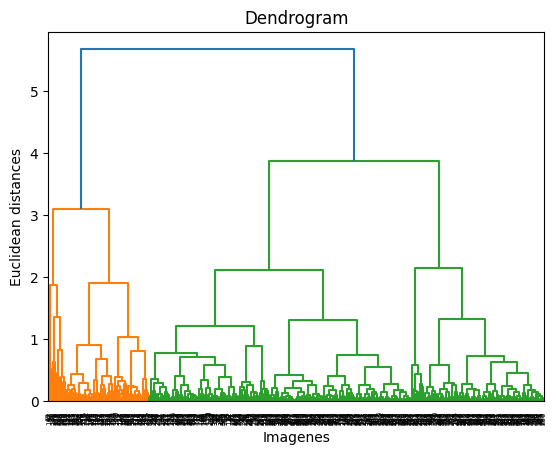

In [26]:
# Using the dendrogram to find the optimal number of clusters
dendrogram_mm = sch.dendrogram(sch.linkage(df_textura_mm_cl, method = 'ward'))
plt.title('Dendrogram')
plt.xlabel('Imagenes')
plt.ylabel('Euclidean distances')
plt.show()

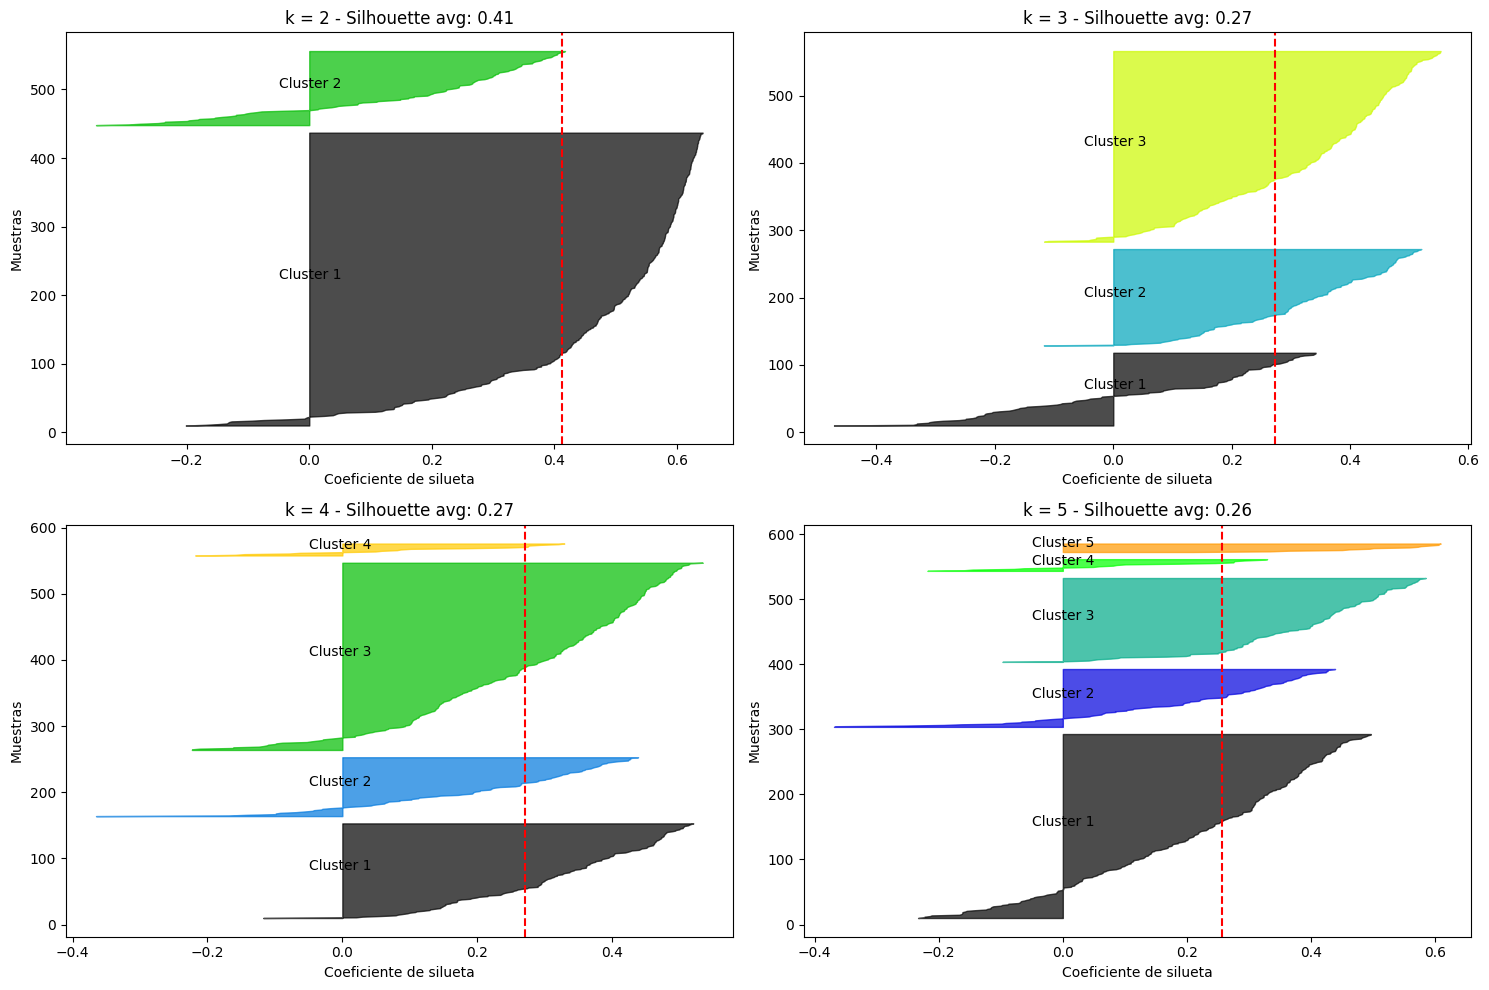

In [27]:
fig, ax = plt.subplots(2, 2, figsize=(15, 10))

# Probar con 2, 3, 4 y 5 clusters
for i, k in enumerate([2, 3, 4, 5]):
    clusterer_mm = AgglomerativeClustering(n_clusters=k, linkage='ward', metric='euclidean')
    labels = clusterer_mm.fit_predict(df_textura_mm_cl)  
    silhouette_vals_mm = silhouette_samples(df_textura_mm_cl, labels)
    silhouette_avg_mm = silhouette_score(df_textura_mm_cl, labels)

    # Subplot row/col
    row = i // 2
    col = i % 2
    ax_i = ax[row][col]
    y_lower = 10

    for j in range(k):
        j_silhouette_vals_mm = silhouette_vals_mm[labels == j]
        j_silhouette_vals_mm.sort()
        size = len(j_silhouette_vals_mm)
        y_upper = y_lower + size
        color = cm.nipy_spectral(float(j) / k)
        ax_i.fill_betweenx(np.arange(y_lower, y_upper), 0, j_silhouette_vals_mm,
                           facecolor=color, edgecolor=color, alpha=0.7)
        ax_i.text(-0.05, y_lower + size / 2, f'Cluster {j+1}')
        y_lower = y_upper + 10

    ax_i.axvline(x=silhouette_avg_mm, color="red", linestyle="--")
    ax_i.set_title(f'k = {k} - Silhouette avg: {silhouette_avg_mm:.2f}')
    ax_i.set_xlabel("Coeficiente de silueta")
    ax_i.set_ylabel("Muestras")

plt.tight_layout()
plt.show()

In [28]:
hc_mm = AgglomerativeClustering(n_clusters = 2, metric = 'euclidean', linkage = 'ward')
y_hc_mm = hc_z.fit_predict(df_textura_mm_cl)

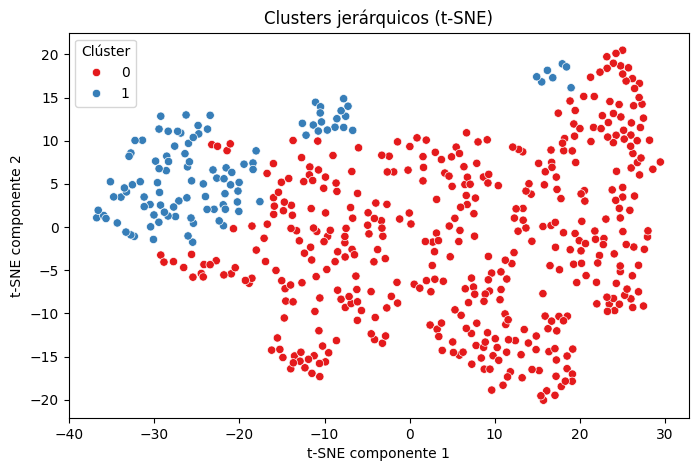

          filename    label  cluster
0      callo_1.png  smaller        0
1     callo_10.png  smaller        0
2    callo_100.png  smaller        1
3    callo_101.png  smaller        0
4    callo_102.png  smaller        1
..             ...      ...      ...
532   callo_95.png   higher        0
533   callo_96.png   higher        0
534   callo_97.png   higher        0
535   callo_98.png   higher        0
536   callo_99.png   higher        0

[537 rows x 3 columns]


In [31]:
#Visualización alternativa con t-SNE 
tsne_mm = TSNE(n_components=2, random_state=42)
X_tsne_mm = tsne_mm.fit_transform(df_textura_mm_cl)

plt.figure(figsize=(8, 5))
sns.scatterplot(x=X_tsne_mm[:, 0], y=X_tsne_mm[:, 1], hue=y_hc_mm, palette='Set1')
plt.title('Clusters jerárquicos (t-SNE)')
plt.xlabel('t-SNE componente 1')
plt.ylabel('t-SNE componente 2')
plt.legend(title='Clúster')
plt.show()

df_resultado_mm = pd.DataFrame({
    'filename': df_textura_mm['filename'], 
    'label': df_textura_mm['label'],
    'cluster': y_hc_mm
})

print(df_resultado_mm)

In [30]:
# Crear la tabla de contingencia entre 'label' y 'cluster'
contingency_table_mm = pd.crosstab(df_resultado_mm['label'], df_resultado_mm['cluster'])

# Mostrar la tabla de contingencia
print(contingency_table_mm)


cluster    0   1
label           
higher   251  17
smaller  177  92


In [32]:
# y_hc_z son las etiquetas del clustering, df_fourier_z_cl los datos
score_mm = silhouette_score(df_textura_mm_cl, y_hc_mm)
print(f'Silhouette Score: {score_mm:.3f}')

Silhouette Score: 0.413


sale muy mezclado